# Importing required libraries

In [4]:
%run ./EODHD_Functions.ipynb
%run ./Option_Pricing_Models.ipynb
import requests
import pandas as pd
import datetime as dt
import numpy as np
import os as os
from textblob import TextBlob
from concurrent.futures import ThreadPoolExecutor
import matplotlib.pyplot as plt
import matplotlib.pyplot as mdates
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
import numpy as np
from datetime import datetime
import numpy as np
import itertools
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.io as pio
from scipy.stats import norm, skew, kurtosis
import numpy as np
from plotly.subplots import make_subplots

# Summarizing stock data

In [7]:
# Summarizing stock
Function = EODHD_Functions()
end_date = dt.datetime.now()
start_date = end_date - dt.timedelta(days=360)

stock_CA = Function.Fetch_historical_price('CVX.US',start_date, end_date,"d")

# Show maximum value of adjusted_close
print("Maximum adjusted_close:", stock_CA['adjusted_close'].max())

# Show minimum value of adjusted_close
print("Minimum adjusted_close:", stock_CA['adjusted_close'].min())

# Calculating daily returns
stock_CA['daily_return'] = stock_CA['adjusted_close'].pct_change()
stock_CA['date'] = pd.to_datetime(stock_CA['date'])

# Mean of daily returns (in percentage)
mean_daily_return_pct = stock_CA['daily_return'].mean() * 100
print(f"Mean of daily returns: {mean_daily_return_pct:.4f}%")

# Standard deviation of daily returns (in percentage)
std_daily_return_pct = stock_CA['daily_return'].std() * 100
print(f"Standard deviation of daily returns: {std_daily_return_pct:.4f}%")

# Calculate log returns
stock_CA['log_return'] = np.log(stock_CA['adjusted_close'] / stock_CA['adjusted_close'].shift(1))

# Remove NaN for stats and plotting
log_returns = stock_CA['log_return'].dropna()

# Skewness and kurtosis
skewness = skew(log_returns)
kurt = kurtosis(log_returns, fisher=True)

print(f"Log returns skewness: {skewness:.4f}")
print(f"Log returns kurtosis: {kurt:.4f}")

# Plotting daily returns


fig = go.Figure()
fig.add_trace(go.Scatter(
    x=stock_CA['date'],
    y=stock_CA['daily_return'] * 100,
    mode='lines',
    name='Daily Returns (%)'
))

fig.update_layout(
    title='Daily Returns of CA.PA',
    xaxis_title='Date',
    yaxis_title='Daily Return (%)',
    xaxis=dict(
        tickformat='%b %Y',
        tickangle=45
    ),
    yaxis=dict(
        tickformat='.2f'
    ),
    template='plotly_white',
    legend=dict(x=0, y=1)
)


# Histogram and normal overlay
hist_data = log_returns.values
mu, sigma = np.mean(hist_data), np.std(hist_data)
x = np.linspace(hist_data.min(), hist_data.max(), 200)
normal_pdf = norm.pdf(x, mu, sigma)

# Interactive plot with daily returns and log return histogram
fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=("Daily Returns of CA.PA", "Histogram of Log Returns vs Normal Distribution"),
    vertical_spacing=0.15
)

# Daily returns line plot
fig.add_trace(
    go.Scatter(
        x=stock_CA['date'],
        y=stock_CA['daily_return'] * 100,
        mode='lines',
        name='Daily Returns (%)'
    ),
    row=1, col=1
)

# Histogram of log returns
fig.add_trace(
    go.Histogram(
        x=log_returns,
        nbinsx=100,
        name='Log Returns',
        histnorm='probability density',
        marker_color='rgba(0,100,200,0.6)'
    ),
    row=2, col=1
)

# Overlay normal distribution
fig.add_trace(
    go.Scatter(
        x=x,
        y=normal_pdf,
        mode='lines',
        name='Normal PDF',
        line=dict(color='red', width=2, dash='dash')
    ),
    row=2, col=1
)

fig.update_layout(
    height=800,
    template='plotly_white',
    showlegend=True,
    legend=dict(x=0.7, y=1.15),
    xaxis=dict(
        tickformat='%b %Y',
        tickangle=45
    ),
    xaxis2_title='Log Return',
    yaxis2_title='Density',
    title=f"Daily Returns and Log Return Distribution<br>Skewness: {skewness:.3f}, Kurtosis: {kurt:.3f}"
)

fig.show()


Maximum adjusted_close: 166.4822
Minimum adjusted_close: 132.1207
Mean of daily returns: 0.0213%
Standard deviation of daily returns: 1.6108%
Log returns skewness: -1.3258
Log returns kurtosis: 6.2205


In [18]:
# Filter Stock_CVX to only the specified earnings dates and plot

import pandas as pd
import plotly.graph_objs as go

# Define the earnings dates as datetime objects
earnings_dates = [
    pd.to_datetime("2025-05-02"),
    pd.to_datetime("2025-01-31"),
    pd.to_datetime("2024-11-01"),
    pd.to_datetime("2024-08-02"),
]

# Fetch the full historical data (adjust start/end as needed)
Stock_CVX = Function.Fetch_historical_price('CVX.US', start_date, end_date, "d")
Stock_CVX['date'] = pd.to_datetime(Stock_CVX['date'])

# Filter for dates within 7 days before and after each earnings date
mask = pd.Series(False, index=Stock_CVX.index)
for edate in earnings_dates:
    mask |= (Stock_CVX['date'] >= (edate - pd.Timedelta(days=14))) & (Stock_CVX['date'] <= (edate + pd.Timedelta(days=14)))
Stock_CVX_window = Stock_CVX[mask].copy()

# Plot interactive graph for only the earnings dates
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=Stock_CVX_window['date'],
    y=Stock_CVX_window['adjusted_close'],
    mode='markers+lines',
    name='Adjusted Close on Earnings Dates',
    marker=dict(size=10, color='red')
))

fig.update_layout(
    title="CVX.US Adjusted Close on Earnings Dates",
    xaxis_title="Date",
    yaxis_title="Adjusted Close",
    template="plotly_white"
)
fig.show()

In [12]:
Stock_CVX = Function.Fetch_historical_price('CVX.US', start_date, end_date, "d")
print(Stock_CVX)

           date  adjusted_close
0    2024-07-19        152.2358
1    2024-07-22        150.1697
2    2024-07-23        147.3956
3    2024-07-24        148.3331
4    2024-07-25        150.6958
..          ...             ...
240  2025-07-07        147.4000
241  2025-07-08        153.2400
242  2025-07-09        153.0200
243  2025-07-10        154.1700
244  2025-07-11        155.3100

[245 rows x 2 columns]


# Using option pricing models to price a call option

Best Fitted Parameters:
mu = -0.1579
lamb = 0.5337
mu_j = 1.1579
sigma_j = 1.4763
Best Model fit (R^2): 59.35%


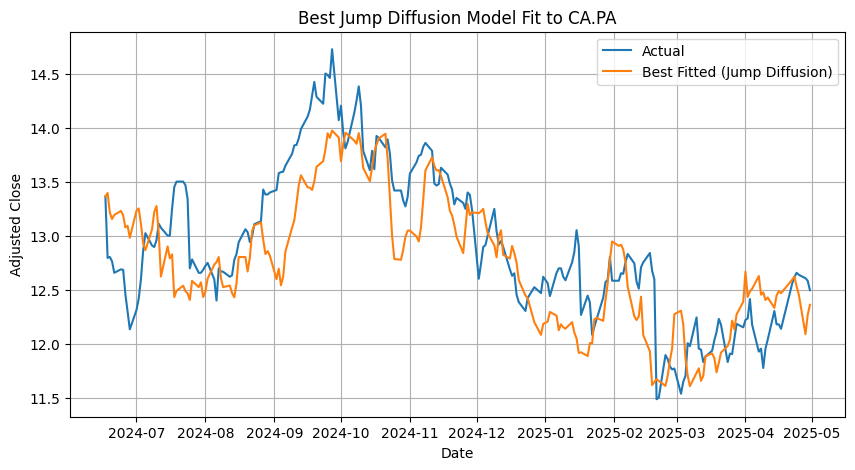

In [10]:
# Grid search for best parameters
mu_range = np.linspace(-1, 1, 30)
lamb_range = np.linspace(0.01, 12.0, 30)
mu_j_range = np.linspace(-0.1, 1.0, 30)
sigma_j_range = np.linspace(0.01, 0.1, 30)

S0 = CA['adjusted_close'].iloc[0]
actual_prices = CA['adjusted_close'].values
N = len(actual_prices)
T = num_days / 252
sigma = Calculate_volatility(CA, 30)

best_r2 = -np.inf
best_params = None
best_fit = None

for mu, lamb, mu_j, sigma_j in itertools.product(mu_range, lamb_range, mu_j_range, sigma_j_range):
    t, simulated = simulate_jump_diffusion(S0, mu, sigma, lamb, mu_j, sigma_j, T, N)
    simulated = np.asarray(simulated).flatten()
    if simulated.shape[0] != actual_prices.shape[0]:
        simulated = np.interp(
            np.arange(len(actual_prices)),
            np.linspace(0, len(actual_prices)-1, len(simulated)),
            simulated
        )
    simulated[0] = actual_prices[0]
    ss_res = np.sum((actual_prices - simulated)**2)
    ss_tot = np.sum((actual_prices - np.mean(actual_prices))**2)
    r2 = 1 - ss_res/ss_tot
    if r2 > best_r2:
        best_r2 = r2
        best_params = (mu, lamb, mu_j, sigma_j)
        best_fit = simulated

fit_percent = best_r2 * 100
mu_fit, lamb_fit, mu_j_fit, sigma_j_fit = best_params

print(f"Best Fitted Parameters:\nmu = {mu_fit:.4f}\nlamb = {lamb_fit:.4f}\nmu_j = {mu_j_fit:.4f}\nsigma_j = {sigma_j_fit:.4f}")
print(f"Best Model fit (R^2): {fit_percent:.2f}%")

# Plot actual vs best fitted
plt.figure(figsize=(10,5))
plt.plot(CA['date'], actual_prices, label='Actual')
plt.plot(CA['date'], best_fit, label='Best Fitted (Jump Diffusion)')
plt.xlabel('Date')
plt.ylabel('Adjusted Close')
plt.title('Best Jump Diffusion Model Fit to CA.PA')
plt.legend()
plt.grid(True)
plt.show()


Testing 810,000 parameter combinations using 16 cores...
Chunk 1/16 completed, best R² so far: -0.6035
Chunk 2/16 completed, best R² so far: -0.3991
Chunk 3/16 completed, best R² so far: 0.2241
Chunk 4/16 completed, best R² so far: 0.3974
Chunk 5/16 completed, best R² so far: 0.4770
Chunk 6/16 completed, best R² so far: 0.4770
Chunk 7/16 completed, best R² so far: 0.5455
Chunk 8/16 completed, best R² so far: 0.5455
Chunk 9/16 completed, best R² so far: 0.5455
Chunk 10/16 completed, best R² so far: 0.5487
Chunk 11/16 completed, best R² so far: 0.5487
Chunk 12/16 completed, best R² so far: 0.5487
Chunk 13/16 completed, best R² so far: 0.5487
Chunk 14/16 completed, best R² so far: 0.5487
Chunk 15/16 completed, best R² so far: 0.5487
Chunk 16/16 completed, best R² so far: 0.5487

Best Fitted Parameters:
mu = 0.2414
lamb = 2.4907
mu_j = -0.0621 (log scale) = -6.02% (percentage)
sigma_j = 0.0286 (log scale) = 2.90% (percentage)
Best Model fit (R²): 54.87%


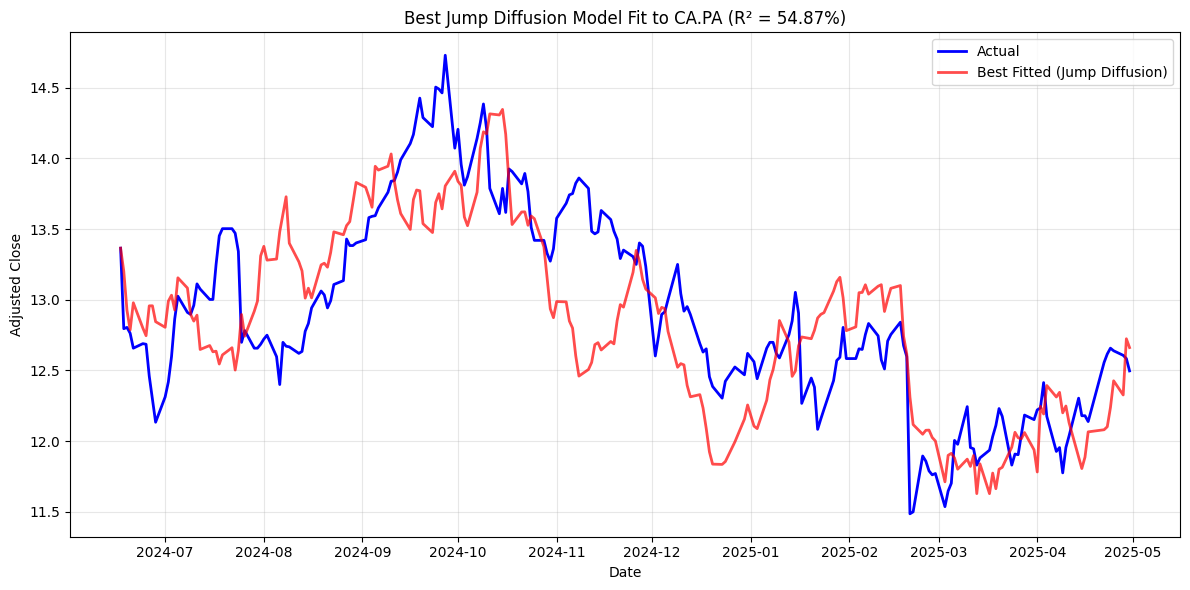

In [9]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from concurrent.futures import ProcessPoolExecutor
import multiprocessing as mp
#Optimzied version

def evaluate_params(param_chunk, S0, sigma, T, N, actual_prices):
    """Evaluate a chunk of parameters and return best result"""
    best_r2 = -np.inf
    best_params = None
    best_fit = None
    
    # Pre-calculate constants
    actual_mean = np.mean(actual_prices)
    ss_tot = np.sum((actual_prices - actual_mean)**2)
    
    for mu, lamb, mu_j, sigma_j in param_chunk:
        try:
            t, simulated = simulate_jump_diffusion(S0, mu, sigma, lamb, mu_j, sigma_j, T, N)
            simulated = np.asarray(simulated).flatten()
            
            # Vectorized interpolation check
            if simulated.shape[0] != actual_prices.shape[0]:
                simulated = np.interp(
                    np.arange(len(actual_prices)),
                    np.linspace(0, len(actual_prices)-1, len(simulated)),
                    simulated
                )
            
            simulated[0] = actual_prices[0]
            
            # Vectorized R² calculation
            ss_res = np.sum((actual_prices - simulated)**2)
            r2 = 1 - ss_res/ss_tot
            
            if r2 > best_r2:
                best_r2 = r2
                best_params = (mu, lamb, mu_j, sigma_j)
                best_fit = simulated.copy()
                
        except Exception:
            continue  # Skip invalid parameter combinations
            
    return best_r2, best_params, best_fit

# Optimized grid search with parallel processing
mu_range = np.linspace(-1, 1, 30)  # Reduced grid size for speed
lamb_range = np.linspace(0.01, 12.0, 30)
mu_j_range = np.linspace(-0.1, 1.0, 30)
sigma_j_range = np.linspace(0.01, 0.1, 30)

S0 = CA['adjusted_close'].iloc[0]
actual_prices = CA['adjusted_close'].values
N = len(actual_prices)
T = num_days / 252
sigma = Calculate_volatility(CA, 30)

# Create parameter combinations and split into chunks
all_params = list(itertools.product(mu_range, lamb_range, mu_j_range, sigma_j_range))
n_cores = min(mp.cpu_count(), 16)  # Use max 8 cores
chunk_size = len(all_params) // n_cores
param_chunks = [all_params[i:i + chunk_size] for i in range(0, len(all_params), chunk_size)]

print(f"Testing {len(all_params):,} parameter combinations using {n_cores} cores...")

# Parallel processing
best_r2 = -np.inf
best_params = None
best_fit = None

with ProcessPoolExecutor(max_workers=n_cores) as executor:
    futures = [executor.submit(evaluate_params, chunk, S0, sigma, T, N, actual_prices) 
               for chunk in param_chunks]
    
    for i, future in enumerate(futures):
        try:
            r2, params, fit = future.result()
            if r2 > best_r2:
                best_r2 = r2
                best_params = params
                best_fit = fit
            print(f"Chunk {i+1}/{len(futures)} completed, best R² so far: {best_r2:.4f}")
        except Exception as e:
            print(f"Chunk {i+1} failed: {e}")

fit_percent = best_r2 * 100
mu_fit, lamb_fit, mu_j_fit, sigma_j_fit = best_params

# Convert to percentage for display
mu_j_percent = (np.exp(mu_j_fit) - 1) * 100
sigma_j_percent = (np.exp(sigma_j_fit) - 1) * 100

print(f"\nBest Fitted Parameters:")
print(f"mu = {mu_fit:.4f}")
print(f"lamb = {lamb_fit:.4f}")
print(f"mu_j = {mu_j_fit:.4f} (log scale) = {mu_j_percent:.2f}% (percentage)")
print(f"sigma_j = {sigma_j_fit:.4f} (log scale) = {sigma_j_percent:.2f}% (percentage)")
print(f"Best Model fit (R²): {fit_percent:.2f}%")

# Plot actual vs best fitted
plt.figure(figsize=(12, 6))
plt.plot(CA['date'], actual_prices, label='Actual', linewidth=2, color='blue')
plt.plot(CA['date'], best_fit, label='Best Fitted (Jump Diffusion)', linewidth=2, color='red', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Adjusted Close')
plt.title(f'Best Jump Diffusion Model Fit to CA.PA (R² = {fit_percent:.2f}%)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [10]:
# Use fitted parameters to simulate jump diffusion and price options
strike = 16
num_simulations = 20000
call_prices = []
put_prices = []

end_date = dt.datetime.now()
days = 30
trading_days = 252
start_date = end_date - dt.timedelta(days=days)
Pricing_CA = Function.Fetch_historical_price("CA.PA", start_date,end_date,"d")
S0 = Pricing_CA['adjusted_close'].iloc[-1]
Pricing_sigma = Calculate_volatility(Pricing_CA, 30)
rf = Function.Fetch_macroecon_data('FR1M.GBOND')['adjusted_close'].iloc[-1]

for _ in range(num_simulations):
    t_sim, simulated_prices = simulate_jump_diffusion(
        S0, mu_fit, Pricing_sigma, lamb_fit, mu_j_fit, sigma_j_fit, T=days/trading_days, N=days
    )
    ST = simulated_prices[-1]
    call_payoff = max(ST - strike, 0)
    put_payoff = max(strike - ST, 0)
    call_prices.append(call_payoff)
    put_prices.append(put_payoff)

call_option_price = (np.mean(call_prices))/(1+(rf/100)**(days/trading_days))
put_option_price = (np.mean(put_prices))/(1+(rf/100)**(days/trading_days))

print(f"Estimated Call Option Price (K={strike}): {call_option_price:.4f}")
print(f"Estimated Put Option Price (K={strike}): {put_option_price:.4f}")

Estimated Call Option Price (K=16): 0.0039
Estimated Put Option Price (K=16): 2.3848


/tmp/ipykernel_7368/4055771008.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


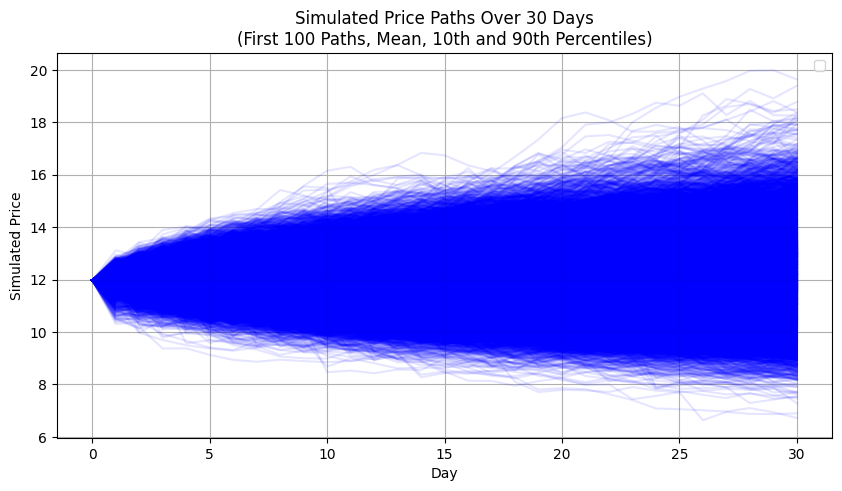

In [11]:
simulated_matrix = []

for _ in range(num_simulations):
    t_sim, simulated_prices = simulate_jump_diffusion(
        S0, mu_fit, Pricing_sigma, lamb_fit, mu_j_fit, sigma_j_fit, T=days/trading_days, N=days
    )
    ST = simulated_prices[-1]
    call_payoff = max(ST - strike, 0)
    put_payoff = max(strike - ST, 0)
    call_prices.append(call_payoff)
    put_prices.append(put_payoff)
    simulated_matrix.append(simulated_prices)

simulated_matrix = np.array(simulated_matrix)
mean_sim = np.mean(simulated_matrix, axis=0)
p10_sim = np.percentile(simulated_matrix, 10, axis=0)
p90_sim = np.percentile(simulated_matrix, 90, axis=0)

# Plot a subset of simulated price paths for visualization
plt.figure(figsize=(10, 5))
for i in range(num_simulations):  # plot first 100 simulated paths for clarity
    plt.plot(simulated_matrix[i], color='blue', alpha=0.1)

plt.xlabel('Day')
plt.ylabel('Simulated Price')
plt.title('Simulated Price Paths Over 30 Days\n(First 100 Paths, Mean, 10th and 90th Percentiles)')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
# creating algorithm to hedge options

def check_and_hedge():
    Latest_CA = Function.Fetch_live_data('CA.PA')
    if Latest_CA.loc[0, 'high'] > 11.5:
        print('hedge it')
    else:
        print('no need to hedge')
    # Wait 60 seconds, then call itself again
    time.sleep(2)
    check_and_hedge()

# Start the recursive check
check_and_hedge()

hedge it
hedge it
hedge it


KeyboardInterrupt: 

In [ ]:
from ibapi.client import EClient
from ibapi.wrapper import EWrapper
from ibapi.contract import Contract
import threading
import time

class IBKRApp(EWrapper, EClient):
    def __init__(self):
        EClient.__init__(self, self)
        self.data = []

    def historicalData(self, reqId, bar):
        # bar has attributes: date, open, high, low, close, volume, barCount, average
        print(f"Time: {bar.date}, Open: {bar.open}, High: {bar.high}, Low: {bar.low}, Close: {bar.close}, Volume: {bar.volume}")
        self.data.append({
            "date": bar.date,
            "open": bar.open,
            "high": bar.high,
            "low": bar.low,
            "close": bar.close,
            "volume": bar.volume,
            "barCount": bar.barCount,
            "average": bar.average
        })

    def historicalDataEnd(self, reqId, start, end):
        print("Historical data download finished")
        self.disconnect()

def run_loop(app):
    app.run()

if __name__ == "__main__":
    app = IBKRApp()
    app.connect("127.0.0.1", 7497, clientId=1)  # 7497 for TWS, 4002 for IB Gateway

    # Define contract (example: Apple stock on SMART/ISLAND, USD)
    contract = Contract()
    contract.symbol = "AAPL"
    contract.secType = "STK"
    contract.exchange = "SMART"
    contract.currency = "USD"

    # Start the socket in a thread
    api_thread = threading.Thread(target=run_loop, args=(app,), daemon=True)
    api_thread.start()

    # Request historical data
    # endDateTime: '' = now, durationStr: '1 D', barSizeSetting: '5 mins', whatToShow: 'TRADES'
    time.sleep(1)  # Wait for connection
    app.reqHistoricalData(
        reqId=1,
        contract=contract,
        endDateTime='',
        durationStr='1 D',
        barSizeSetting='5 mins',
        whatToShow='TRADES',
        useRTH=1,
        formatDate=1,
        keepUpToDate=False,
        chartOptions=[]
    )

    # Wait for data to finish
    time.sleep(10)
    app.disconnect()

In [ ]:
import requests
import time

# Replace with your actual IBKR Client Portal Gateway URL and AAPL conid
BASE_URL = "https://localhost:5000/v1/api"
CONID = "265598"  # Example conid for AAPL; use the correct one for your symbol

def fetch_historical_data_webapi(conid, period="1d", bar="5min"):
    """
    Fetch historical data for a given conid using IBKR Web API.
    period: e.g. '1d', '1w', '1m'
    bar: e.g. '5min', '1hour', '1day'
    """
    url = f"{BASE_URL}/iserver/marketdata/history"
    params = {
        "conid": conid,
        "period": period,
        "bar": bar
    }
    try:
        response = requests.get(url, params=params, verify=False)
        response.raise_for_status()
        data = response.json()
        bars = data.get("data", [])
        for bar in bars:
            print(
                f"Time: {bar['t']}, Open: {bar['o']}, High: {bar['h']}, "
                f"Low: {bar['l']}, Close: {bar['c']}, Volume: {bar['v']}"
            )
        return bars
    except Exception as e:
        print(f"Error fetching data: {e}")
        return []

if __name__ == "__main__":
    # Fetch and print historical bars for AAPL (example conid)
    fetch_historical_data_webapi(CONID, period="1d", bar="5min")